In [2]:
##importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Getting Data from Existing employees and Employees who have left
df_existing_employee = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name = 'Existing employees')
df_ex_employee = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name = 'Employees who have left')

In [46]:
## display first five rows of Existing employees
df_existing_employee.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [47]:
## display first five rows of Employees who have left
df_ex_employee.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


# Adding new columns in both datasets for attrition : with value 0 for existing emplopyees and 1 for  Employees who have left
---

In [48]:
df_existing_employee['attrition'] = 0

In [50]:
df_ex_employee['attrition'] = 1

In [51]:
## concatenate both Dataset into a new dataset for all emplyee
df_employee = pd.concat([df_existing_employee,df_ex_employee], ignore_index=True)

In [52]:
df_employee.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
14994,14995,0.40,0.57,2,151,3,0,0,support,low,1
14995,14996,0.37,0.48,2,160,3,0,0,support,low,1
14996,14997,0.37,0.53,2,143,3,0,0,support,low,1
14997,14998,0.11,0.96,6,280,4,0,0,support,low,1
14998,14999,0.37,0.52,2,158,3,0,0,support,low,1


In [177]:
df_ex_employee['salary'].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [178]:
df_ex_employee['promotion_last_5years'].value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

In [179]:
df_ex_employee['Work_accident'].value_counts()


0    3402
1     169
Name: Work_accident, dtype: int64

In [181]:
df_ex_employee['number_project'].value_counts()


2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64

In [53]:
## Shape of all datasets
display(df_existing_employee.shape)
display(df_ex_employee.shape)
display(df_employee.shape)

(11428, 11)

(3571, 11)

(14999, 11)

In [54]:
#Delete column Id , useless column
df_employee.drop(['Emp ID'], axis = 1, inplace = True)

In [55]:
## #Get overview of the dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
attrition                14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [57]:
###Display some statistics information of the dataset
df_employee.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
attrition,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


In [58]:
#Display some statistics information of the dataset only include categorical values
df_employee.describe(include=['object'])

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [61]:
##Percentage of attrition
df_employee['attrition'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: attrition, dtype: float64

([<matplotlib.patches.Wedge at 0x279609d8048>,
 [Text(-0.8063869332849134, 0.7481578134507135, 'No'),
  Text(0.8063869683087074, -0.7481577757010162, 'Yes')],
 [Text(-0.43984741815540723, 0.4080860800640255, '76.19%'),
  Text(0.43984743725929487, -0.40808605947328147, '23.81%')])

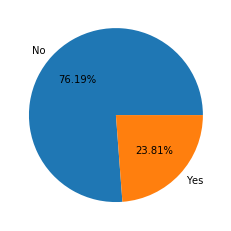

In [112]:
plt.pie(df_employee['attrition'].value_counts(normalize = True), labels = ['No', "Yes"], autopct= '%1.2f%%')

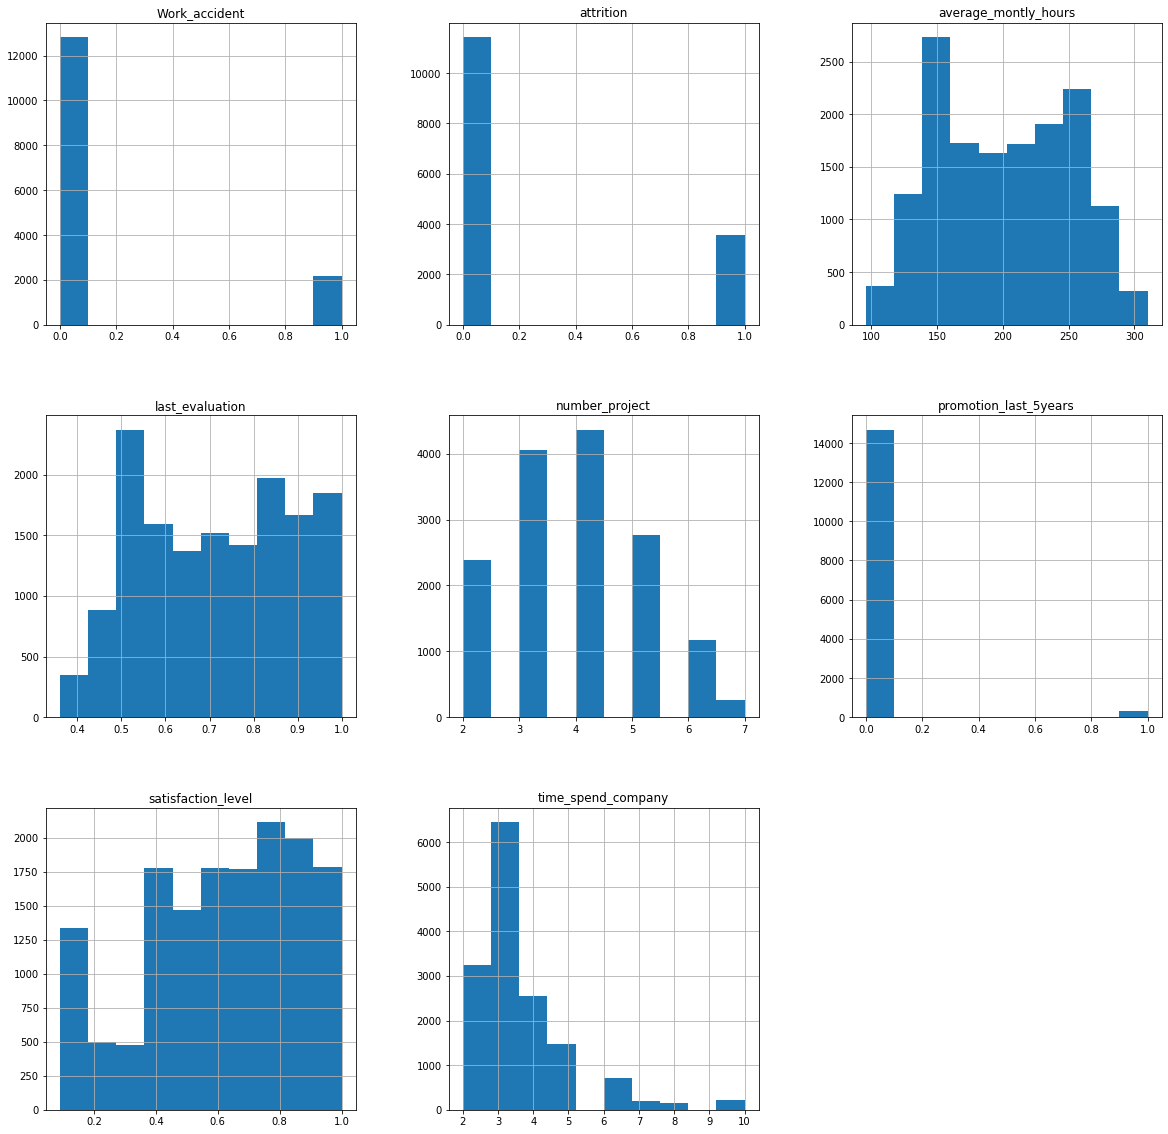

In [62]:
##visualise the dataset of employees
df_employee.hist(figsize=(20,20))
plt.show()

Text(0.5, 1.0, 'attrition')

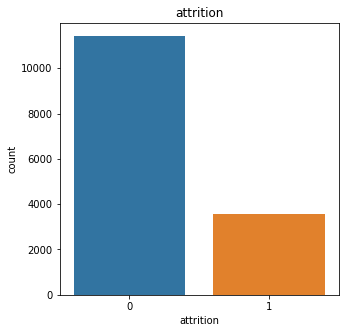

In [84]:
sns.countplot(df_employee['attrition'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('attrition')

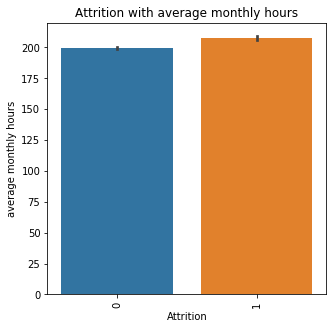

In [91]:
## employees average monthly hours  by attrition 
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df_employee['attrition'],y=df_employee['average_montly_hours'])
plt.xticks(rotation=90)
plt.xlabel("Attrition")
plt.ylabel("average monthly hours")
plt.title("Attrition with average monthly hours")
plt.show()

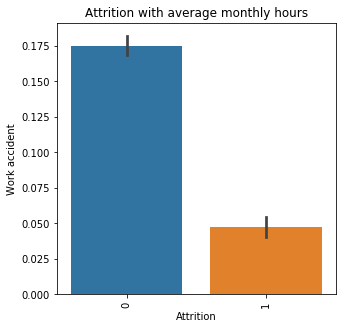

In [92]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df_employee['attrition'],y=df_employee['Work_accident'])
plt.xticks(rotation=90)
plt.xlabel("Attrition")
plt.ylabel("Work accident")
plt.title("Attrition with Work accident")
plt.show()

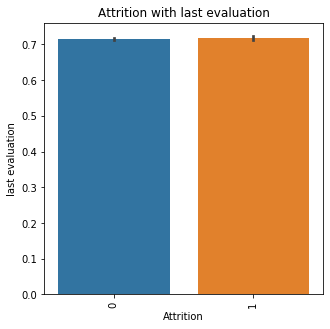

In [93]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df_employee['attrition'],y=df_employee['last_evaluation'])
plt.xticks(rotation=90)
plt.xlabel("Attrition")
plt.ylabel("last evaluation")
plt.title("Attrition with last evaluation")
plt.show()

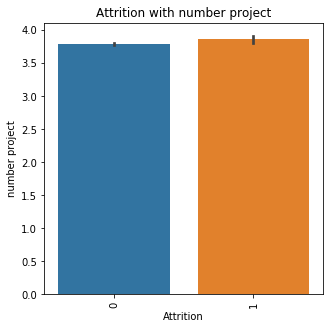

In [94]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df_employee['attrition'],y=df_employee['number_project'])
plt.xticks(rotation=90)
plt.xlabel("Attrition")
plt.ylabel("number project")
plt.title("Attrition with number project")
plt.show()

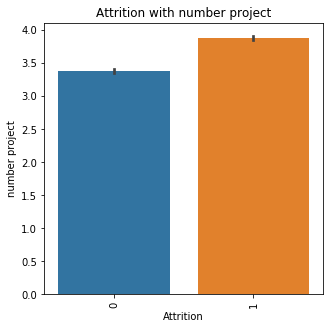

In [96]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df_employee['attrition'],y=df_employee['time_spend_company'])
plt.xticks(rotation=90)
plt.xlabel("Attrition")
plt.ylabel("number project")
plt.title("Attrition with number project")
plt.show()

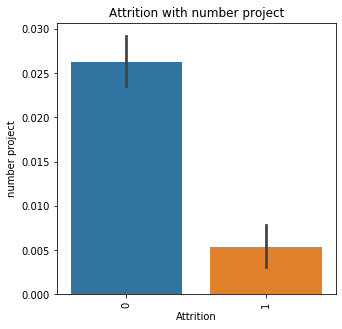

In [97]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df_employee['attrition'],y=df_employee['promotion_last_5years'])
plt.xticks(rotation=90)
plt.xlabel("Attrition")
plt.ylabel("number project")
plt.title("Attrition with number project")
plt.show()

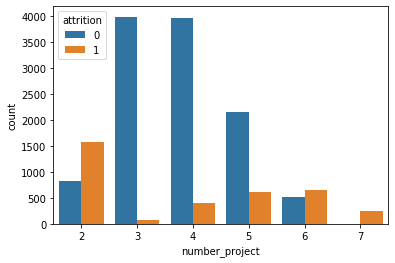

In [100]:
sns.countplot(x = 'number_project', hue = 'attrition', data = df_employee)

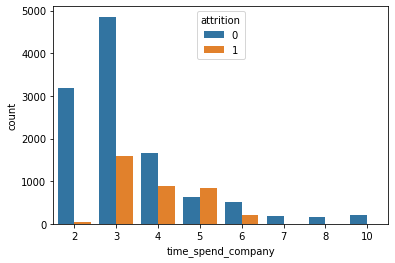

In [101]:
sns.countplot(x = 'time_spend_company', hue = 'attrition', data = df_employee)

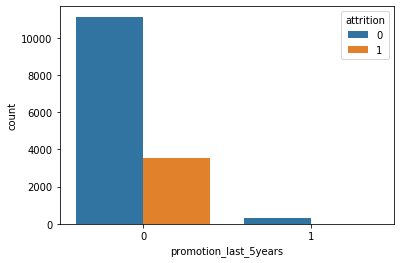

In [102]:
sns.countplot(x = 'promotion_last_5years', hue = 'attrition', data = df_employee)

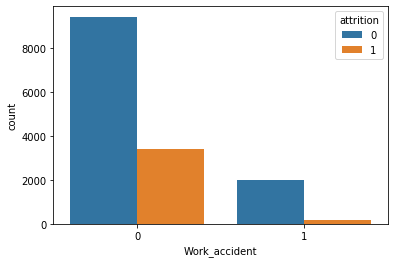

In [103]:
sns.countplot(x = 'Work_accident', hue = 'attrition', data = df_employee)

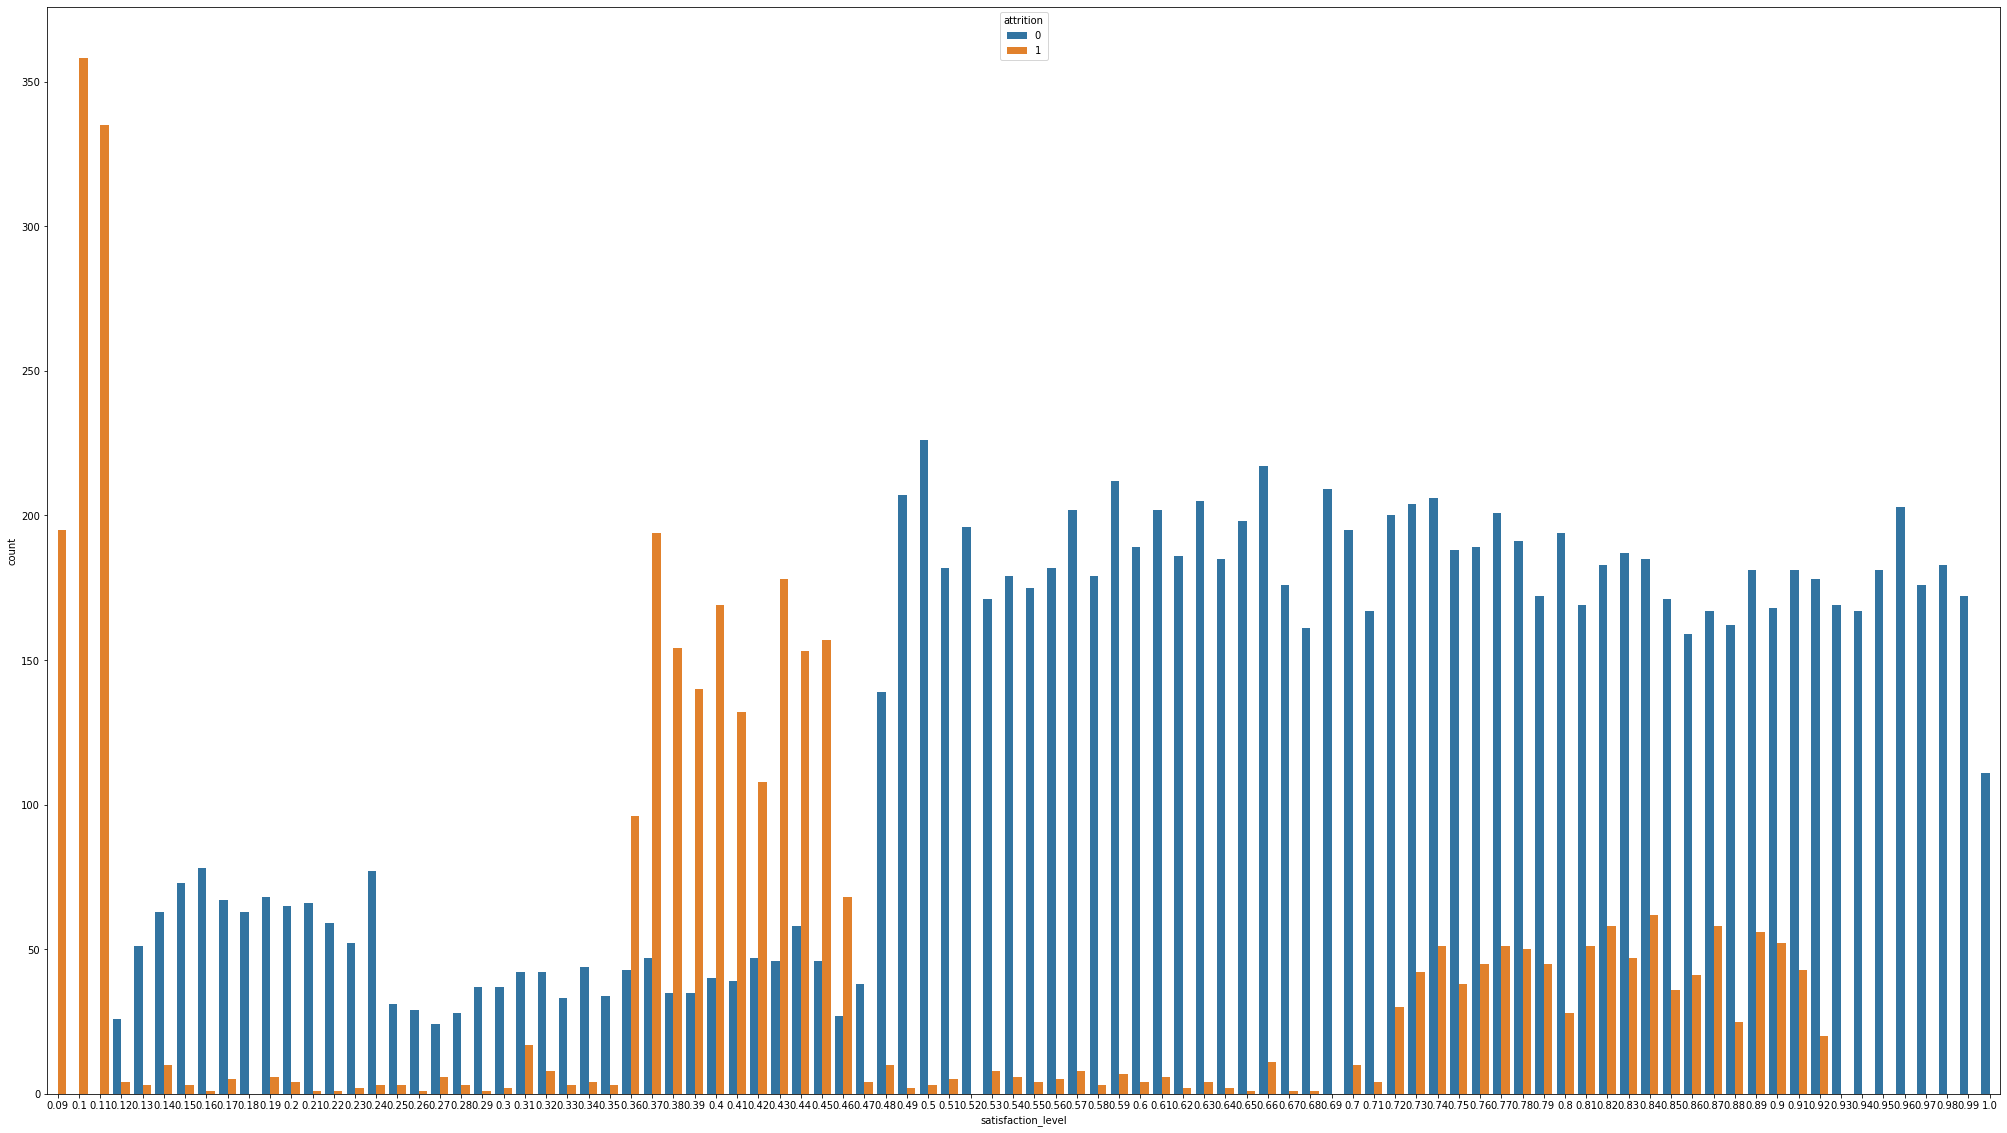

In [119]:
plt.figure(figsize = (35,20))
sns.countplot(x = 'satisfaction_level', hue = 'attrition', data = df_employee)

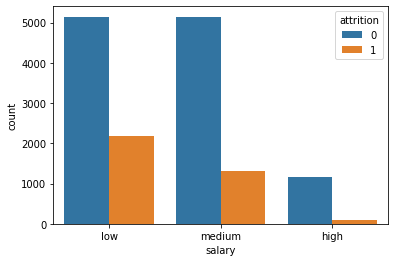

In [106]:
sns.countplot(x = 'salary', hue = 'attrition', data = df_employee)


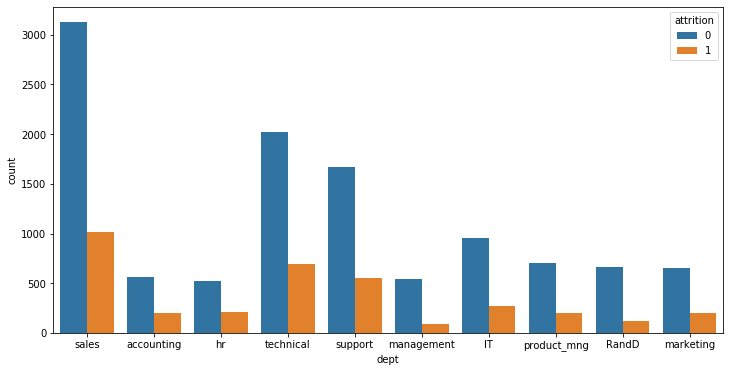

In [110]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'dept', hue = 'attrition', data = df_employee)

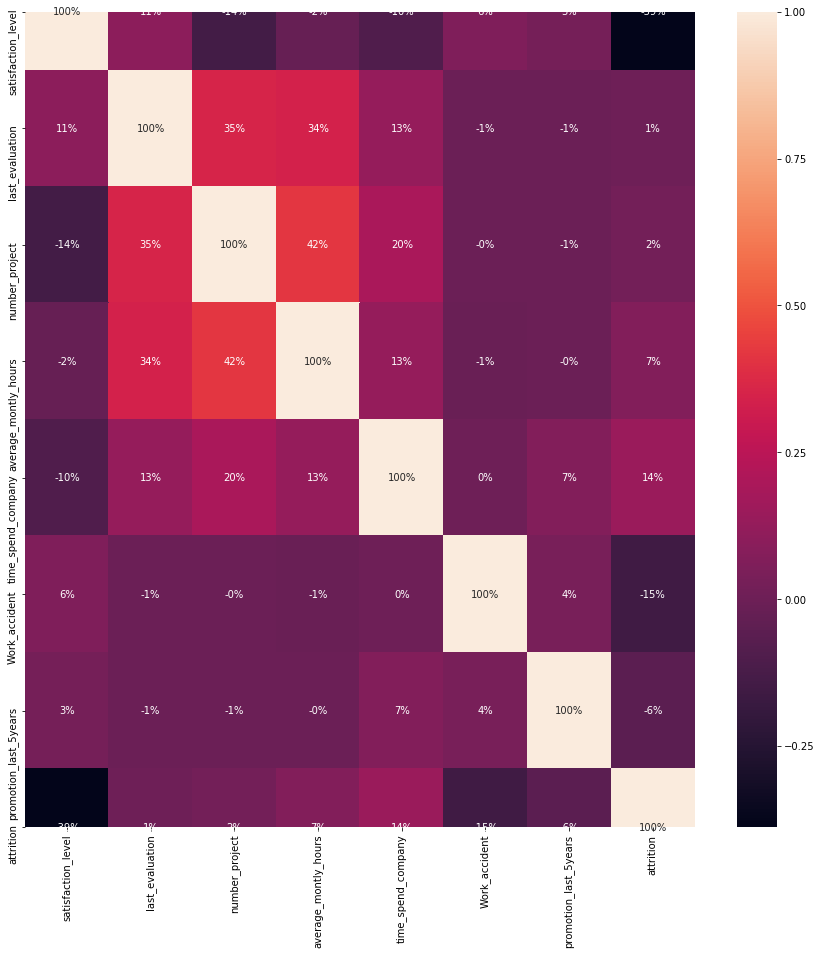

In [111]:
plt.figure(figsize = (15,15))
sns.heatmap(df_employee.corr(), annot = True, fmt = '.0%')

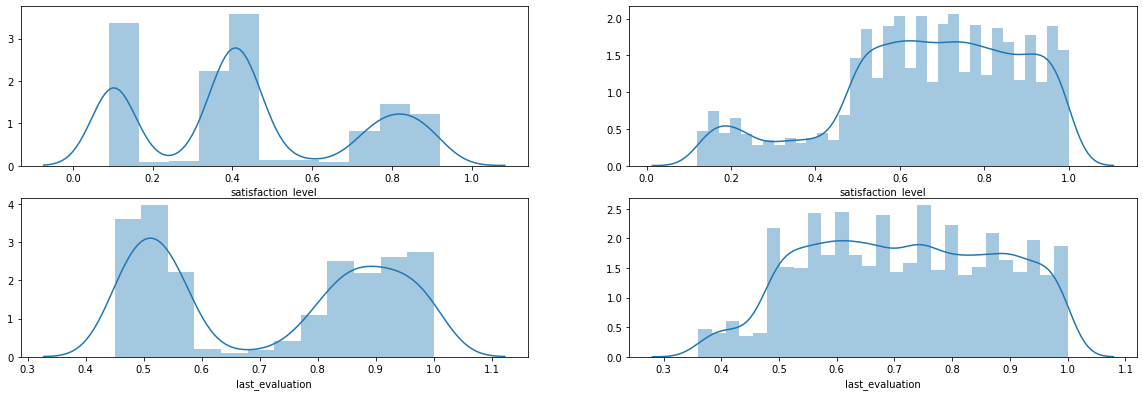

In [129]:
fig = plt.figure(figsize=(20,17))
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)

sns.distplot(df_ex_employee['satisfaction_level'],ax = ax1)
sns.distplot(df_existing_employee['satisfaction_level'],ax = ax2)
sns.distplot(df_ex_employee['last_evaluation'], kde=True,ax=ax3)
sns.distplot(df_existing_employee['last_evaluation'], kde=True,ax=ax4)

In [131]:
from sklearn.preprocessing import LabelEncoder

df_employee['dept'] = LabelEncoder().fit_transform(df_employee['dept'])
df_employee['salary'] = LabelEncoder().fit_transform(df_employee['salary'])

In [132]:
df_employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,7,1,0
1,0.82,0.67,2,202,3,0,0,7,1,0
2,0.45,0.69,5,193,3,0,0,7,1,0
3,0.78,0.82,5,247,3,0,0,7,1,0
4,0.49,0.60,3,214,2,0,0,7,1,0


In [188]:
x = df_employee.drop('attrition', axis = 1)
y = df_employee['attrition']

In [137]:
from sklearn.model_selection import train_test_split

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)

In [184]:
forest.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [185]:
forest.score(x_train, y_train)

0.9985776513467863

In [186]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(x_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

cm

array([[2836,   10],
       [  25,  879]], dtype=int64)

In [187]:
print('Model testing accuracy: {}'.format((TP + TN) / (TN + TP + FN + FP)))

Model testing accuracy: 0.9906666666666667


In [155]:
from sklearn import tree
modelTree = tree.DecisionTreeClassifier(max_depth=3)
modelTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [164]:
modelTree.score(x_test,y_test)

0.9517333333333333

In [190]:
#divide our data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#Implement the decision tree classifier algorithm on the IRIS Training dataset
classifier = DecisionTreeClassifier()
print(classifier.fit(x_train, y_train))

#Find the accuracy of the decision tree 
print(classifier.score(x_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.9786666666666667
